# Assignment 5: PCA and Clustering (40 marks)
### Due: December 6 at 11:59pm 
(Dropbox will remain open until December 8 at 11:59pm)

### Name: Paolo Geronimo

The purpose of this assignment is to practice using PCA and clustering techniques on a given dataset.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Principle Component Analysis (PCA) (18 marks)

### Step 1. Load data (2 marks)

You have been asked by an agricultural company to help them predict the type of wheat based on kernel characteristics. You have been given all the information you need in the seeds_dataset.txt file on D2L. The original dataset can be found [here](https://archive.ics.uci.edu/dataset/236/seeds)

The first step is to read in the file using pandas and inspect the first few columns. Note that the data is in a text file, so the separator is different compared to a csv file.

In [3]:
# TODO: Import dataset and inspect the first five columns
df = pd.read_table('seeds_dataset.txt', header = None)
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


Next, you will need to separate the data into your feature matrix and target vector.

In [4]:
# TODO: Separate the data into feature matrix and target vector. Print the shape of X and y
y = df.iloc[:, 7]
X = df.drop(7, axis = 1)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (210, 7)
Shape of y: (210,)


### Step 2: Preprocessing (2 marks)

To preprocess the data, we will need to scale the data. Which scaler would you select and why? *(1 mark)* 

*ANSWER HERE*

I will choose the Standard Scaler as it is typically the general first choice for a scaler.

Before we implement the scaler, we need to split the data into training and testing sets first.

In [5]:
# TODO: Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
# TODO: Print the shape of the training feature matrix and target vector
print(f"Shape of training feature matrix: {X_train.shape}")
print(f"Shape of training target vector: {y_train.shape}")

Shape of training feature matrix: (157, 7)
Shape of training target vector: (157,)


Now that we have our training data, we can implement our selected scaler.

In [7]:
# TODO: Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [8]:
# TODO: Instantiate model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [9]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [10]:
#TODO: Implement the grid search and print the best parameters, cross-validation score and test score
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(model, param_grid, cv = 5, scoring = 'accuracy')
grid.fit(X_train_scaled, y_train)

test_score = grid.score(X_test_scaled, y_test)

print(f"Best parameters: {grid.best_params_}")
print(f"Best cross validation score: {grid.best_score_}")
print(f"Test score: {test_score}")

Best parameters: {'C': 10.0, 'fit_intercept': True}
Best cross validation score: 0.9368951612903226
Test score: 0.9622641509433962


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [11]:
# TODO: Predict y labels using best estimator
y_pred = grid.predict(X_test_scaled)

In [12]:
# TODO: Reduce dimensions of test data for plotting
from sklearn.decomposition import PCA

pca = PCA()
pca_result = pca.fit_transform(X_test_scaled)
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, 8)])
pca_df['target'] = y_test

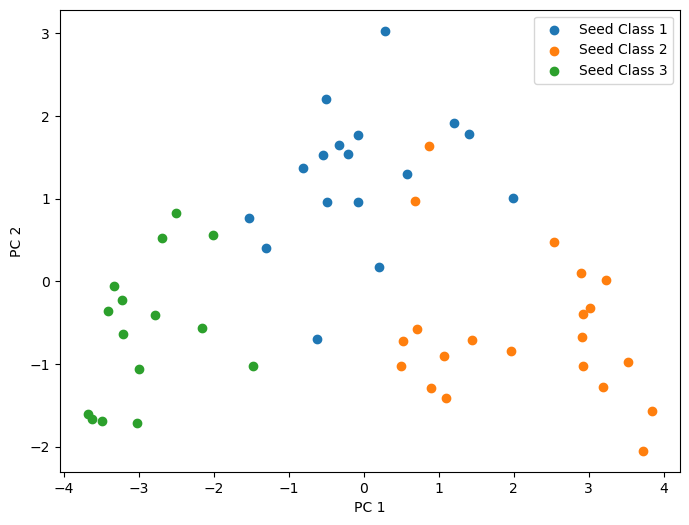

In [13]:
# TODO: Plot test points colored by predicted label

# create dataframes from pca results and y_test
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, 8)])
y_test_df = pd.DataFrame(y_test)
y_test_df.reset_index(inplace = True, drop = True)

# add y_test to pca_df
pca_df['target'] = y_test_df

plt.figure(figsize=(8, 6))
for seed_class in range(1, 4):
    plt.scatter(
        pca_df.loc[pca_df['target'] == seed_class, 'PC1'],
        pca_df.loc[pca_df['target'] == seed_class, 'PC2'],
        label=f'Seed Class {seed_class}'
    )

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*
1. Yes, this is a good model. The cross validation and test scores are both very high and there is not much difference (~0.3) between them.
2. It looks like the PCA did work well for this dataset, as there is a pretty clear boundary between classes besides two samples in Class 2 that look like they are in the Class 1 region. This relates to the linear regression model we used because PCA is also linear, so it makes sense that PCA would work well for a dataset that fits well on a linear model.

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. My code is sourced from the in-class PCA examples and Lab 8.
2. I completed the steps in chronological order.
3. I did not use generative AI.
4. My biggest challenge was the plot. The wording was a bit confusing at first but Lab 8 helped a lot with how to implement it. There were also a couple extra steps I had to figure out. Since we are plotting the test data only in this assignment, I had to reset the index of y_test to make it line up with pca_result properly

## Part 2. Implement clustering (20 marks)

The agricultural company approaches you again because they lost all the labels for their data. Use the Kmeans clustering method to assign labels to the seeds dataset used in Part 1.

### Step 1: Cluster using original data (6 marks)

This part of the assignment asks you to implement Kmeans clustering using the orginal feature matrix (after scaling has been performed). 

In [14]:
# TODO: Scale feature matrix

df_scaled = X.copy()
scaler = StandardScaler()
scaler.fit(df_scaled)
df_scaled = pd.DataFrame(scaler.transform(df_scaled), columns=df_scaled.columns)
df_scaled

,0,1,2,3,4,5,6
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
...,...,...,...,...,...,...,...
205,-0.915515,-1.043321,0.309736,-1.112048,-0.736716,-0.046135,-1.097413
206,-1.246235,-1.288937,-0.844122,-1.105261,-1.230328,0.416540,-0.826156
207,-0.567571,-0.690247,0.733948,-0.888070,-0.070604,3.076588,-0.718060
208,-1.036090,-1.035645,-0.801701,-1.026077,-1.121521,-0.068135,-0.742535


The first step is to use the elbow method to determine the optimal number of clusters. In this case, you can use the distortion metric.

C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to ha

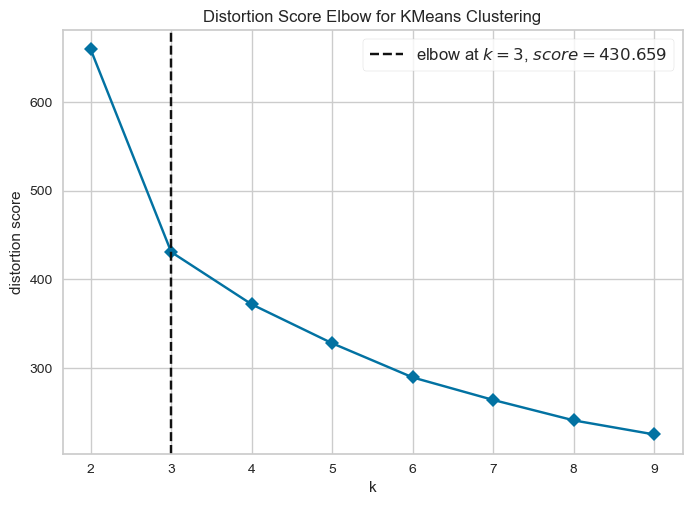

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=0), k=(2, 10),
                 timings=False)

In [15]:
# TODO: Use the elbow method to determine the optimal number of clusters
from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
kelbow_visualizer(KMeans(random_state = 0), df_scaled, k=(2,10), 
                  metric='distortion',
                 timings=False)

Next, implement Kmeans and calculate the following validation metrics:
- Silhouette score
- Calinski-Harabasz score
- Davies-Bouldin score

In [16]:
# TODO: Implement K-means with the number of clusters determined in the previous step
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(df_scaled)


C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [21]:
# TODO: Calculate the three different validation metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

s_score1 = silhouette_score(df_scaled, y)
c_h_score1 = calinski_harabasz_score(df_scaled, y)
d_b_score1 = davies_bouldin_score(df_scaled, y)

print(f"Silhouette score: {s_score1}")
print(f"Calinski-Harabasz score: {c_h_score1}")
print(f"Davies-Bouldin score: {d_b_score1}")

Silhouette score: 0.3675516589195562
Calinski-Harabasz score: 221.73959349615563
Davies-Bouldin score: 0.9746865102557086


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

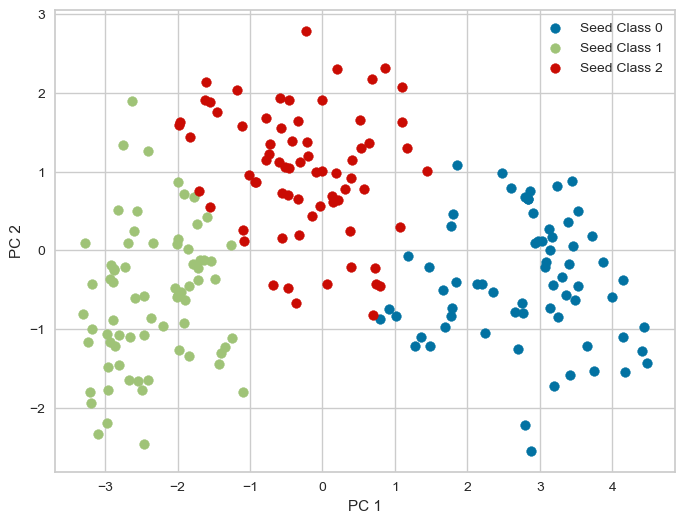

In [22]:
# TODO: Plot clustering results

pca = PCA()
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, 8)])
pca_df['target'] = kmeans.labels_

plt.figure(figsize=(8, 6))
for seed_class in range(0, 3):
    plt.scatter(
        pca_df.loc[pca_df['target'] == seed_class, 'PC1'],
        pca_df.loc[pca_df['target'] == seed_class, 'PC2'],
        label=f'Seed Class {seed_class}'
    )

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

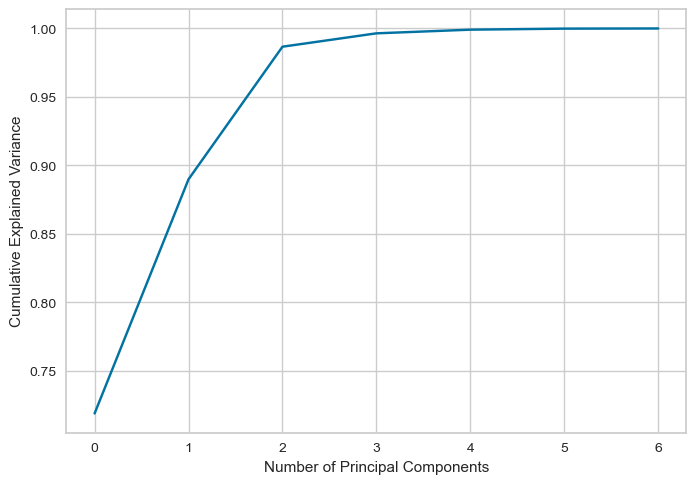

In [23]:
# TODO: Find the number of principal components using explained variance ratio
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumulative_explained_variance)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [27]:
# TODO: Use PCA to transform the data

# Based on the graph, 2 components is enough to reach the threshold of 95%.
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(data = pca_result, columns = [f'PC{i}' for i in range(1, 3)])
pca_df

,PC1,PC2
0,0.317047,0.783669
1,-0.003386,1.913214
2,-0.459443,1.907225
3,-0.591936,1.931069
4,1.102910,2.068090
...,...,...
205,-1.991107,0.865956
206,-2.726865,-0.208190
207,-1.403633,-1.298593
208,-2.339328,0.099699


In [29]:
# TODO: Implement K-means with the transformed data
kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(pca_df)

C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Paolo\anaconda3\envs\ensf611\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [31]:
# TODO: Calculate the three different validation metrics

s_score2 = silhouette_score(pca_df, kmeans.labels_)
c_h_score2 = calinski_harabasz_score(pca_df, kmeans.labels_)
d_b_score2 = davies_bouldin_score(pca_df, kmeans.labels_)

print(f"Silhouette score: {s_score2}")
print(f"Calinski-Harabasz score: {c_h_score2}")
print(f"Davies-Bouldin score: {d_b_score2}")

Silhouette score: 0.4934304869603191
Calinski-Harabasz score: 397.301078386368
Davies-Bouldin score: 0.7066734757979803


### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [32]:
# TODO: Display results
results_df = pd.DataFrame(columns = ["Step 1", "Step 2"], index = ["Silhouette score", "Calinski-Harabasz score", "Davies-Bouldin score"])
results_df["Step 1"] = [s_score1, c_h_score1, d_b_score1]
results_df["Step 2"] = [s_score2, c_h_score2, d_b_score2]
results_df

,Step 1,Step 2
Silhouette score,0.367552,0.493430
Calinski-Harabasz score,221.739593,397.301078
Davies-Bouldin score,0.974687,0.706673


#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*
1. Yes, the 3 optimal clusters makes sense since we know the data has 3 labels.
2. Yes, the plot does look similar to the plot from part 1.
3. Two components were used in the PCA analysis to explain the 95% variance threshold. Using PCA did improve the results as seen in results_df. Silhouette score increased, Calinski-Harabasz score increased, and Davies-Bouldin score decreased. 


### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*
1. My code is sourced from the PCA in-class examples, and Labs 8 and 9.
2. I completed the steps in chronological order.
3. I did not use generative AI.
4. The biggest challenge for me was making the distinction between steps 1 and 2. It felt like I was doing the same thing over and over but I realized that the order of operations matters quite a bit. In step 1, we did KMeans first, then PCA. In step 2, we did PCA first then KMeans

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*

I enjoyed the challenge of this assignment, as I had a little more trouble grasping the theory of these topics compared to the concepts in the previous assignments. I definitely had to take more time to revisit the lecutre material, examples, and labs.